In [1]:
datasets = ['breast-cancer-wisconsin-data.csv', 'car_evaluation.csv', 'diabetes.csv', 'iris.csv', 'titanic.csv', 'haberman.csv']
output_name = ['diagnosis','eval','Outcome','Species','Survived','Survival']
num_classes = [2,4,2,3,2,2]
num_features = [30,6,8,4,9,3]
useless_features = [['id'],[],[],['Id'],['PassengerId','Name'],[]]
num_cuts = [12,num_features[1],num_features[2],4,num_features[4],num_features[5]]


In [2]:
from pytorch_DNDT import *

seed = 1943 #like in the paper's code

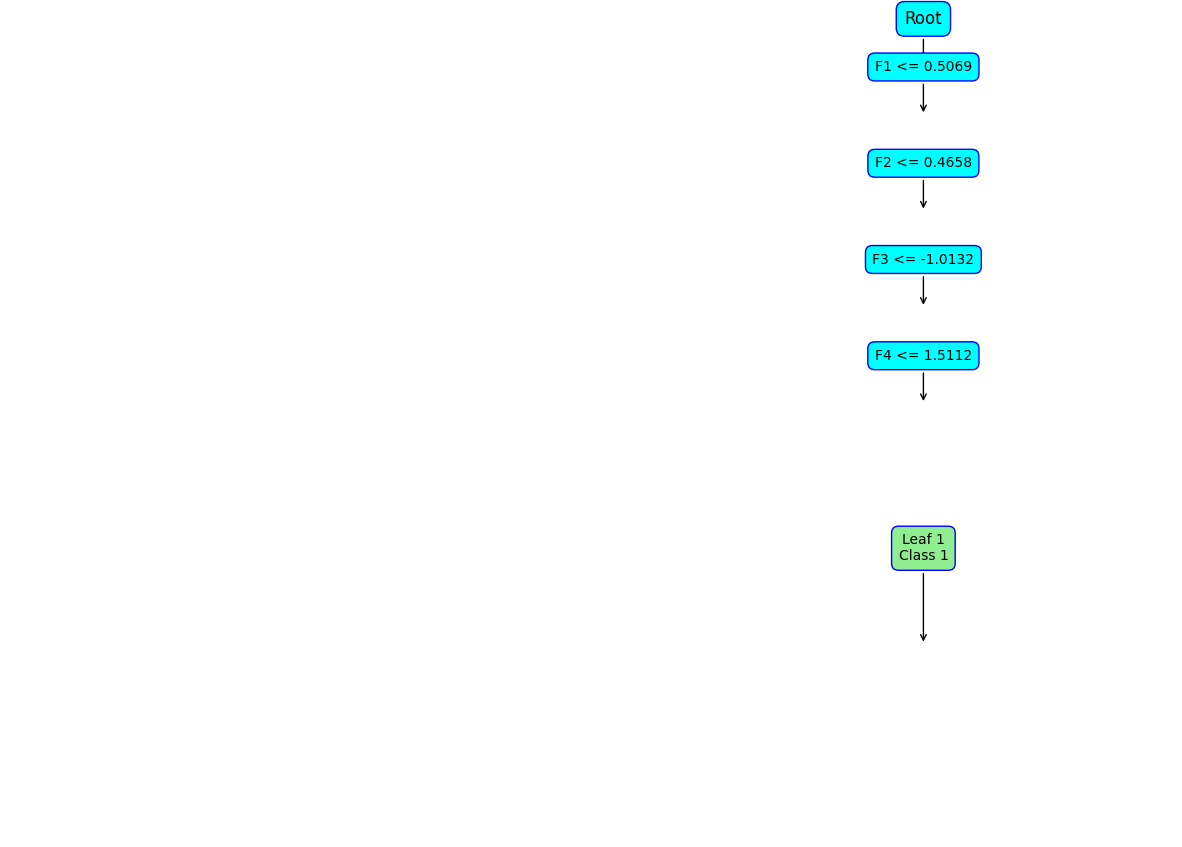

iris.csv DNDT Normalized Split: 0.967


In [4]:
#def build_test_DNDT(datafile, output_column_name, num_features, num_cuts, seed=None, exclude_features=[], normalized=False, test_train_split=False):

i=3



dndt_val_norm_split = build_test_DNDT(datasets[i], output_name[i], num_features[i], num_cuts[i], seed, useless_features[i], True, True, cuts_per_feat=1)
print(datasets[i] + ' DNDT Normalized Split: ' + str(round(dndt_val_norm_split, 3)))

We now check how the number of cutpoints affects the results

In [4]:
cut_points = np.array([1, 2, 3, 4])
iris_res = np.zeros((cut_points.shape))
car_res = np.zeros((cut_points.shape))
hab_res = np.zeros((cut_points.shape))

In [5]:
i = 3
for j in range(cut_points.size):
    dndt_val_norm = build_test_DNDT(datasets[i], output_name[i], num_features[i], num_cuts[i], seed, useless_features[i], True, False, cut_points[j])
    iris_res[j] = dndt_val_norm
    print(f"{cut_points[j]}: {dndt_val_norm}")

1: 0.96
2: 0.9933333333333333
3: 0.9733333333333334
4: 1.0


In [6]:
i = 1
for j in range(cut_points.size):
    dndt_val_norm = build_test_DNDT(datasets[i], output_name[i], num_features[i], num_cuts[i], seed, useless_features[i], True, False, cut_points[j])
    car_res[j] = dndt_val_norm
    print(f"{cut_points[j]}: {dndt_val_norm}")

In [ ]:
i = 5
for j in range(cut_points.size):
    dndt_val_norm = build_test_DNDT(datasets[i], output_name[i], num_features[i], num_cuts[i], seed, useless_features[i], True, False, cut_points[j])
    hab_res[j] = dndt_val_norm
    print(f"{cut_points[j]}: {dndt_val_norm}")

1: 0.7549019607843137
2: 0.7712418300653595
3: 0.7843137254901961
4: 0.8235294117647058


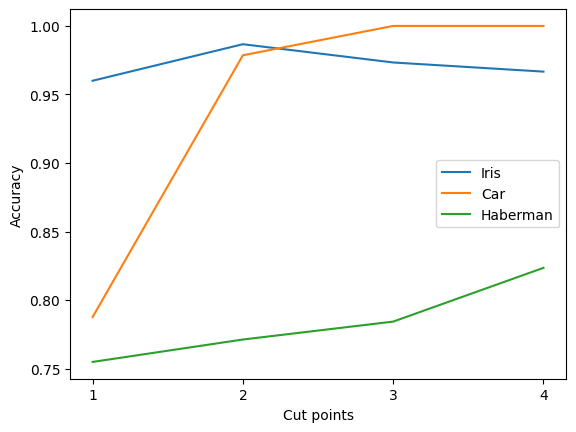

In [ ]:
# Plotting
import matplotlib.pyplot as plt
plt.plot(cut_points, iris_res, label="Iris")
plt.plot(cut_points, car_res, label="Car")
plt.plot(cut_points, hab_res, label="Haberman")
plt.xticks(cut_points)
plt.xlabel("Cut points")
plt.ylabel("Accuracy")
plt.legend()
plt.show()